## Breast cancer exercise: prediction of malignant

- select best model, what are top 3 features?


In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as skms

from sklearn.ensemble import RandomForestClassifier


In [2]:
raw_data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/data-breast-cancer.csv')
raw_data = pd.DataFrame(raw_data)
raw_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data = raw_data.drop(columns = ['id','Unnamed: 32'])

#### Explore features

In [99]:
# diagnosis will be disregarded coz binary/object
corr_values = data.corr()

corr_values.style.background_gradient(cmap = 'coolwarm')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589
texture_mean,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185
area_mean,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376
smoothness_mean,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.0764372,-0.261477,-0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.000110995,0.164174,0.0398299,-0.0901702,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,-0.253691,-0.0512692,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [170]:
# drop some features
data_clean = data.drop(columns = ['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst',
                                 'radius_se','perimeter_se'])

print('Model got worse!')

Model got worse!


#### split data into train and test

In [171]:
data_pred = data.drop(columns = ['diagnosis'])
y = data_clean['diagnosis']

In [172]:
X_train, X_test, y_train, y_test = skms.train_test_split(data_pred, y, test_size = 0.2)

In [173]:
# check for balanced output
y_train.value_counts()

B    278
M    177
Name: diagnosis, dtype: int64

#### Train random forest

In [140]:
# RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#                        warm_start=False, class_weight=None)

# criterion = internal loss function
# n_estimators = number of trees it runs, is not cross validation!

# metric to see how rf performed: default score is: accuray; if outcome is biased, use balanced accuracy!
# --> use cross validation for diff metric

In [174]:
# test diff paramters
max_depth_list = list(range(8, 25))

mean_roc_auc_rf = []

for i in max_depth_list:
    
    randFor = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_depth = i)

    mean_roc_auc_rf.append(np.mean(skms.cross_val_score(randFor, X_train, y_train, cv = 6, scoring = 'roc_auc')))
        

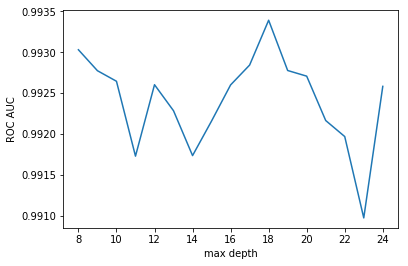

In [175]:
plt.plot(max_depth_list, mean_roc_auc_rf)
plt.xlabel('max depth')
plt.ylabel('ROC AUC')
None

### Use best model with best max_depth

In [200]:
# use best model to get feature importances
randFor_best = RandomForestClassifier(n_estimators = 1000, max_depth = 18).fit(X_train, y_train)

mean_roc_auc_best = np.mean(skms.cross_val_score(randFor_best, X_train, y_train, cv = 6, scoring = 'roc_auc'))
mean_roc_auc_best

0.992201151197451

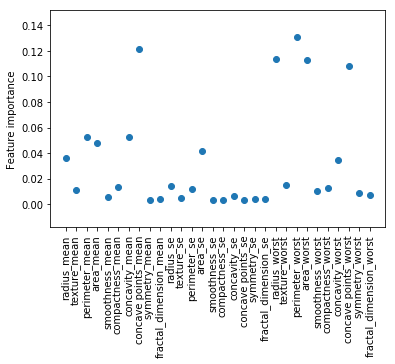

In [201]:
# plot feature importance
feature_imp = randFor_best.feature_importances_

# get feature names
feature_names = list(X_train)

plt.scatter(range(1, len(feature_imp)+1), feature_imp)
plt.xticks(range(1, len(feature_imp)+1),feature_names, rotation = 90)
plt.ylabel('Feature importance')
None

In [202]:
feature_imp_df = pd.DataFrame(feature_imp, feature_names)
feature_imp_df = feature_imp_df.rename(columns = {0:'Feature_Importance'})

feature_imp_df = feature_imp_df.sort_values('Feature_Importance', ascending = False)
feature_imp_df.head(3)

,Feature_Importance
perimeter_worst,0.130537
concave points_mean,0.121693
radius_worst,0.113416


### Hyperparameter Tuning with Random Search

- start with huge ranges!

- run Rand search several times, is very fast

- check if result is always in same range --> limit it further

In [ ]:
# RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, 
#                    iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, 
#                    random_state=None, error_score=’raise-deprecating’, return_train_score=False)

# n_iter : how many rand samples you want to take from all combinations of params
# n_jobs = -1 # uses all cores of my mac
# verbose = 1 # prints updates

In [167]:
parameters_RS = {'n_estimators': list(range(250, 280, 5)), 'criterion': ['entropy'], 
                 'max_depth': list(range(10, 20, 1)), 'min_samples_split': [5] , 
                 'min_samples_leaf': [2,3]}

rand_for = RandomForestClassifier()

myRS = skms.RandomizedSearchCV(estimator = rand_for, param_distributions = parameters_RS, 
                               scoring = 'roc_auc', cv = 3, n_iter = 20,
                               n_jobs = -1, verbose = 1).fit(X_train, y_train)



best_params_RandS = myRS.best_params_
best_params_RandS

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished


{'n_estimators': 260,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'entropy'}

### Hyperparameter FINE Tuning with Grid search

- take already optimized ranges from random search

In [168]:
# skms.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid=’warn’, 
#                                refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, 
#                                error_score=’raise-deprecating’, return_train_score=False)

rand_for = RandomForestClassifier()

myGS = skms.GridSearchCV(estimator = rand_for, scoring = 'roc_auc', param_grid = parameters_RS, 
                         cv = 3, n_jobs = -1, verbose = 1).fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.2min finished


In [169]:
best_params_GridS = myGS.best_params_
best_params_GridS

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 265}

In [189]:
# retrieve best model
randFor_opti = myGS.best_estimator_

### Use best model with optimized=tuned parameters

In [205]:
# cross val model
mean_roc_auc_opti = np.mean(skms.cross_val_score(randFor_opti, X_train, y_train, cv = 6, scoring = 'roc_auc'))


In [207]:
print('ROC_AUC score of best model (part 1) = %.6f. ' % mean_roc_auc_best)
print('ROC_AUC score of model after hyperparameter tuning (part 3) = %.6f. ' % mean_roc_auc_opti)

ROC_AUC score of best model (part 1) = 0.992201. 
ROC_AUC score of model after hyperparameter tuning (part 3) = 0.993069. 


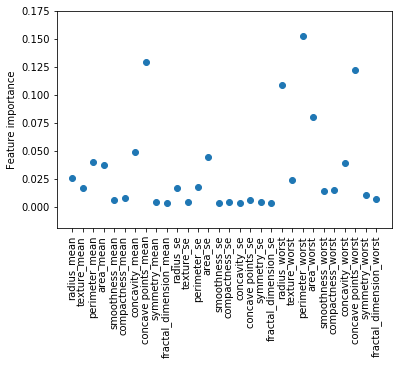

In [210]:
# plot feature importance
feature_imp_opti = randFor_opti.feature_importances_

# get feature names
feature_names = list(X_train)

plt.scatter(range(1, len(feature_imp_opti)+1), feature_imp_opti)
plt.xticks(range(1, len(feature_imp_opti)+1),feature_names, rotation = 90)
plt.ylabel('Feature importance')
None

In [211]:
feature_imp_df = pd.DataFrame(feature_imp_opti, feature_names)
feature_imp_df = feature_imp_df.rename(columns = {0:'Feature_Importance'})

feature_imp_df = feature_imp_df.sort_values('Feature_Importance', ascending = False)
feature_imp_df.head(3)

,Feature_Importance
perimeter_worst,0.152106
concave points_mean,0.129088
concave points_worst,0.122448
